!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import numpy as np
import keras
from sklearn.manifold import TSNE
# processing imports
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import time
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from numpy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
def evaluate_model(name, y_true, y_pred,pred_time):
    print(f"Time for {name}: {pred_time:.2f} seconds")
    print(classification_report(y_true, y_pred, zero_division=0))

    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_weighted": precision_score(y_true, y_pred, average="weighted", zero_division=0),
        "recall_weighted": recall_score(y_true, y_pred, average="weighted", zero_division=0),
        "f1_weighted": f1_score(y_true, y_pred, average="weighted", zero_division=0),
        "execution_time": pred_time
    }

In [3]:
def report_heatmap(y_pred,y_test,title="Confusion matrix"):
    
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    figsize=(8,5)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    ax.set_title(title)

    plt.tight_layout()
    plt.show()

In [4]:
def plot_confusion_matrix(y_test, y_pred_prob, title="Confusion matrix"):
    """
    Plots the confusion matrix given the true labels and predicted probabilities.
    
    Parameters:
    - y_true: Encoded true labels
    - y_pred_prob: DataFrame containing predicted probabilities with class names as columns
    - title: Title of the plot (default: "Confusion matrix")
    """
    figsize=(8,5)
    classes = y_pred_prob.columns
    y_pred = y_pred_prob.idxmax(axis=1)  # convert probabilities to predicted class labels
    
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    ax.set_title(title)

    plt.tight_layout()
    plt.show()

In [5]:
df=pd.read_csv('../data/external/anomaly.csv')

In [6]:
df.drop("id.resp_p", axis=1, inplace=True)
df.drop("id.orig_p", axis=1, inplace=True)


In [7]:

del df['Unnamed: 0']

In [8]:
df.head()

,duration,orig_bytes,resp_bytes,orig_pkts,resp_pkts,label,proto_tcp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
0,0.000000,0.000000,0.000000,1.0,0.0,1,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.000000,0.000000,1.0,0.0,1,1.0,0.0,0.0,1.0,0.0
2,0.000000,0.000000,0.000000,1.0,0.0,0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.000000,0.000000,1.0,0.0,0,1.0,0.0,0.0,1.0,0.0
4,143302.138915,3525.226581,20.488061,2.0,0.0,1,1.0,0.0,0.0,1.0,0.0


In [9]:
df['label'].value_counts()

label
1    997203
0    869401
Name: count, dtype: int64

In [10]:
df.shape

(1866604, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866604 entries, 0 to 1866603
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   duration        float64
 1   orig_bytes      float64
 2   resp_bytes      float64
 3   orig_pkts       float64
 4   resp_pkts       float64
 5   label           int64  
 6   proto_tcp       float64
 7   conn_state_OTH  float64
 8   conn_state_REJ  float64
 9   conn_state_S0   float64
 10  conn_state_S1   float64
dtypes: float64(10), int64(1)
memory usage: 156.7 MB


In [12]:
df.describe()

,duration,orig_bytes,resp_bytes,orig_pkts,resp_pkts,label,proto_tcp,conn_state_OTH,conn_state_REJ,conn_state_S0,conn_state_S1
count,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06,1.866604e+06
mean,8.788205e+04,2.869782e+03,7.880784e+02,-2.845415e+02,3.024536e-01,5.342338e-01,8.188653e-01,8.439858e-02,3.100050e-03,8.272216e-01,5.612829e-05
std,4.822044e+05,1.501312e+06,4.443303e+04,8.187887e+04,3.078124e+01,4.988268e-01,3.861116e-01,2.781328e-01,5.587889e-02,3.784681e-01,7.516804e-03
min,-1.983671e+04,-1.759311e+04,-1.366105e+04,-1.741483e+04,-1.010365e+01,0.000000e+00,-1.942783e-01,-6.360886e-02,-4.370962e-02,-1.264435e-01,-6.731916e-03
25%,-3.825331e+02,0.000000e+00,0.000000e+00,-2.043450e+02,0.000000e+00,0.000000e+00,9.770007e-01,0.000000e+00,0.000000e+00,9.840293e-01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.166583e+03,3.147493e+03,4.689134e+02,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,7.325719e-04,0.000000e+00,1.000000e+00,0.000000e+00
max,9.000000e+06,1.744830e+09,1.166889e+07,6.602735e+07,8.060087e+03,1.000000e+00,1.206040e+00,1.053910e+00,1.035103e+00,1.129620e+00,1.002381e+00


In [13]:
df.std()

duration          4.822044e+05
orig_bytes        1.501312e+06
resp_bytes        4.443303e+04
orig_pkts         8.187887e+04
resp_pkts         3.078124e+01
label             4.988268e-01
proto_tcp         3.861116e-01
conn_state_OTH    2.781328e-01
conn_state_REJ    5.587889e-02
conn_state_S0     3.784681e-01
conn_state_S1     7.516804e-03
dtype: float64

In [14]:
df.shape

(1866604, 11)

In [15]:
x = df.drop(["label"], axis=1)
y = df["label"].values

In [16]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
# normalize data
scaler = MinMaxScaler()  
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [18]:
X_train.shape

(1493283, 10)

In [19]:
y_train.shape

(1493283,)

# LSTM

In [20]:
all_results = []

In [21]:
#Selected
L_S_T_M2 = keras.models.Sequential([
keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
keras.layers.LSTM(10, return_sequences=True),
keras.layers.LSTM(5),
keras.layers.Dense(1,activation='sigmoid')
])

L_S_T_M2.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
L_S_T_M2.summary()

L_S_T_M2.fit(x, y,batch_size=100,epochs=2)

c:\Users\Infomedia\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 20)       │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 10)       │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 5)              │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,326 (12.99 KB)

 Trainable params: 3,326 (12.99 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
18667/18667 ━━━━━━━━━━━━━━━━━━━━ 166s 9ms/step - accuracy: 0.9290 - loss: 0.1920
Epoch 2/2
18667/18667 ━━━━━━━━━━━━━━━━━━━━ 114s 6ms/step - accuracy: 0.9422 - loss: 0.1524


In [22]:
start=time.time()

y_pred_L_S_T_M2=(L_S_T_M2.predict(X_test)> 0.5)

end=time.time()
pred_time= end - start

11667/11667 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


Time for LSTM: 22.63 seconds
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    173880
           1       0.93      1.00      0.96    199441

    accuracy                           0.96    373321
   macro avg       0.96      0.96      0.96    373321
weighted avg       0.96      0.96      0.96    373321

Overall Accuracy: 95.91%
--------------------------


C:\Users\Infomedia\AppData\Local\Temp\ipykernel_6484\593410940.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


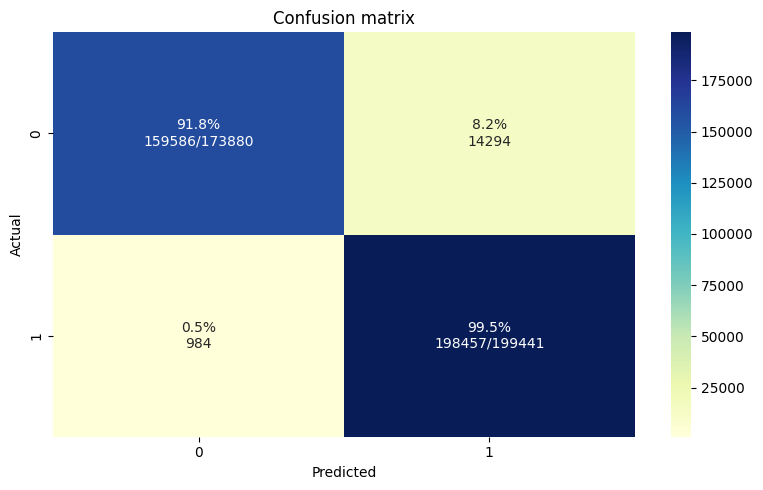

In [23]:
nb_metrics = evaluate_model("LSTM", y_test, y_pred_L_S_T_M2, pred_time)
all_results.append(("LSTM", nb_metrics))
report_heatmap(y_pred_L_S_T_M2,y_test)

  ANN

In [24]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

input_shape = (x.shape[1], 1)
ann = keras.models.Sequential([
    keras.layers.Flatten(input_shape=input_shape),  # Aplatit les entrées
    keras.layers.Dense(64, activation='relu'),     # Couche dense
    keras.layers.Dense(32, activation='relu'),     # Une autre couche dense
    keras.layers.Dense(1, activation='sigmoid')    # Sortie binaire
])

ann.compile(loss='binary_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy'])

ann.summary()

# Entraînement
ann.fit(x, y, batch_size=100, epochs=3)

c:\Users\Infomedia\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
18667/18667 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.9298 - loss: 378.8717
Epoch 2/3
18667/18667 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.9416 - loss: 63.4833
Epoch 3/3
18667/18667 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - accuracy: 0.9494 - loss: 74.6470


In [25]:
start=time.time()

y_pred_ann=(ann.predict(X_test)> 0.5)

end=time.time()
pred_time= end -start

11667/11667 ━━━━━━━━━━━━━━━━━━━━ 7s 559us/step


Time for ann: 8.42 seconds
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    173880
           1       0.92      1.00      0.96    199441

    accuracy                           0.95    373321
   macro avg       0.96      0.95      0.95    373321
weighted avg       0.96      0.95      0.95    373321

Overall Accuracy: 95.41%
--------------------------


C:\Users\Infomedia\AppData\Local\Temp\ipykernel_6484\593410940.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


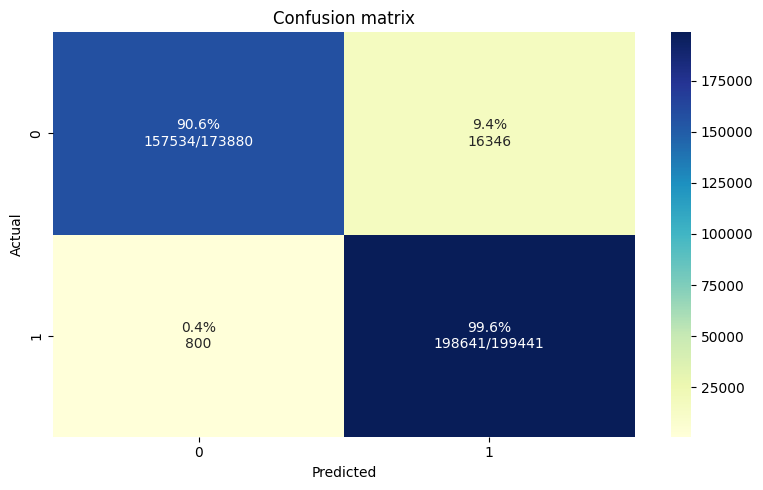

In [26]:
nb_metrics = evaluate_model("ann", y_test, y_pred_ann, pred_time)
all_results.append(("ann", nb_metrics))
report_heatmap(y_pred_ann,y_test)

RF

In [27]:
from LearningAlgorithms import ClassificationAlgorithms


In [28]:
learner= ClassificationAlgorithms()

	Training random forest
Time for RF: 1.40 seconds
              precision    recall  f1-score   support

           0       0.99      0.92      0.96    173880
           1       0.93      1.00      0.96    199441

    accuracy                           0.96    373321
   macro avg       0.96      0.96      0.96    373321
weighted avg       0.96      0.96      0.96    373321



C:\Users\Infomedia\AppData\Local\Temp\ipykernel_6484\2600397247.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


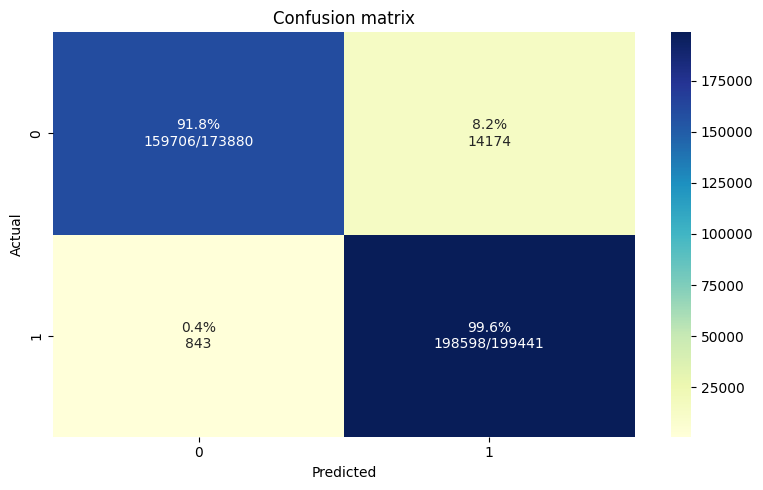

In [29]:
print("\tTraining random forest")
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
    pred_time,
) = learner.random_forest(X_train_scaled, y_train, X_test_scaled ,gridsearch=False)

nb_metrics = evaluate_model("RF", y_test, class_test_y, pred_time)
all_results.append(("RF", nb_metrics))
plot_confusion_matrix(y_test, class_test_prob_y)

DT

	Training decision tree
Time for DT: 0.23 seconds
              precision    recall  f1-score   support

           0       0.99      0.92      0.96    173880
           1       0.93      1.00      0.96    199441

    accuracy                           0.96    373321
   macro avg       0.96      0.96      0.96    373321
weighted avg       0.96      0.96      0.96    373321



C:\Users\Infomedia\AppData\Local\Temp\ipykernel_6484\2600397247.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


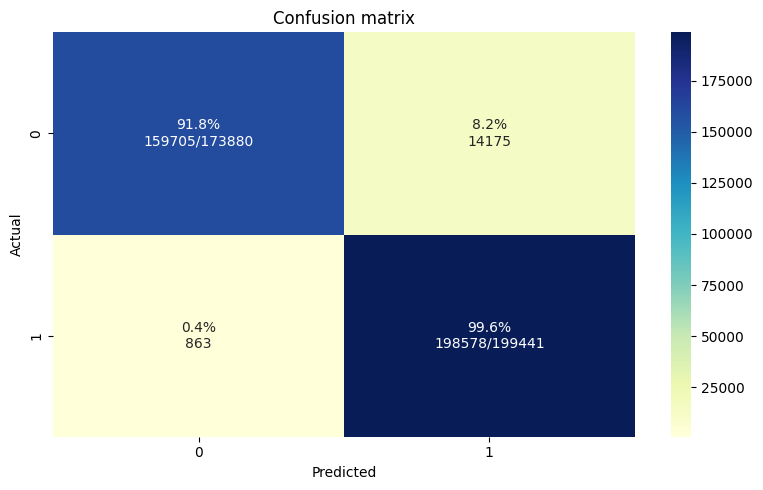

In [30]:
print("\tTraining decision tree")
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
    pred_time,
) = learner.decision_tree(
    X_train_scaled, y_train, X_test_scaled, gridsearch=False
)

nb_metrics = evaluate_model("DT", y_test, class_test_y, pred_time)
all_results.append(("DT", nb_metrics))
plot_confusion_matrix(y_test, class_test_prob_y)

In [31]:
# ------------- Save metrics to score_df -------------
score_df=pd.DataFrame()
models, metrics = zip(*all_results)
new_scores = pd.DataFrame({
    "model": models,
    "accuracy": [m["accuracy"] for m in metrics],
    "precision_weighted": [m["precision_weighted"] for m in metrics],
    "recall_weighted": [m["recall_weighted"] for m in metrics],
    "f1_weighted": [m["f1_weighted"] for m in metrics],
    "execution_time": [m["execution_time"] for m in metrics],
})

score_df = pd.concat([score_df, new_scores], ignore_index=True)

In [32]:
score_df

,model,accuracy,precision_weighted,recall_weighted,f1_weighted,execution_time
0,LSTM,0.959075,0.961252,0.959075,0.958922,22.630027
1,ann,0.954072,0.957027,0.954072,0.953859,8.421841
2,RF,0.959775,0.961966,0.959775,0.959623,1.402901
3,DT,0.959718,0.961902,0.959718,0.959567,0.229753


C:\Users\Infomedia\AppData\Local\Temp\ipykernel_6484\890864598.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=long_df, x='metric', y='score', hue='model', ci=None)


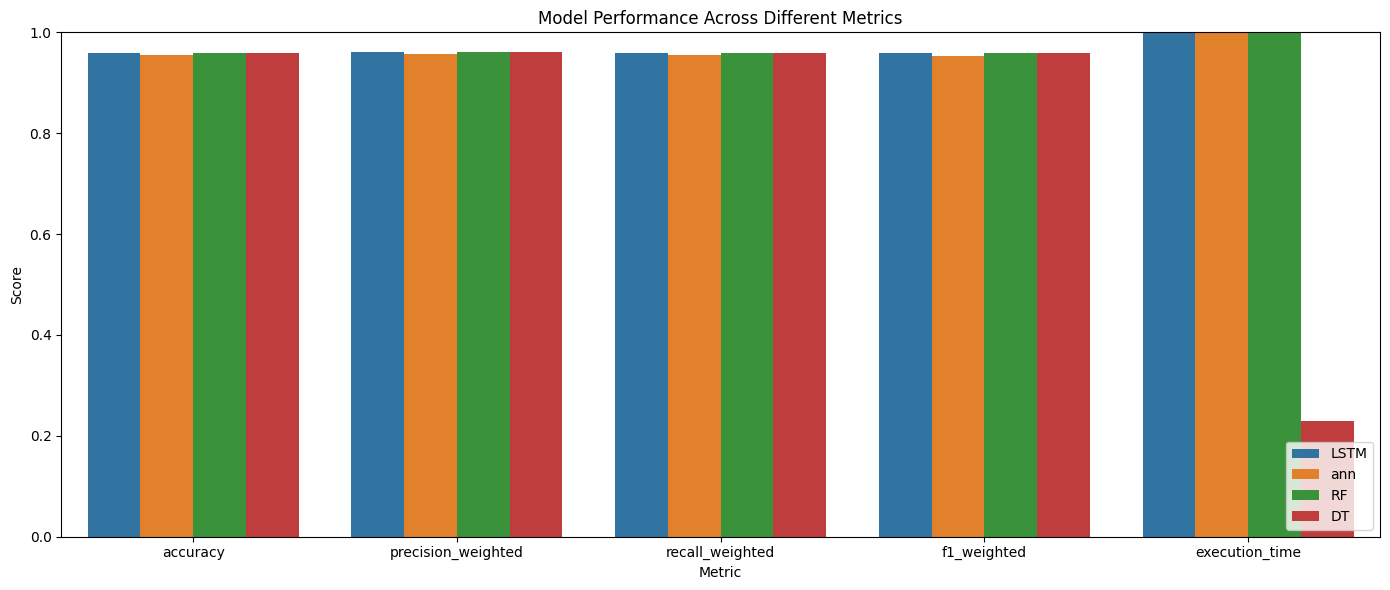

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Melt the DataFrame to long format
metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'execution_time']

long_df = score_df.melt(
    id_vars=['model'],
    value_vars=metrics,
    var_name='metric',
    value_name='score'
)

# Step 2: Plot all metrics in one grouped barplot
plt.figure(figsize=(14, 6))
sns.barplot(data=long_df, x='metric', y='score', hue='model', ci=None)

plt.title('Model Performance Across Different Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1 if long_df['metric'].isin(metrics[:-1]).any() else None)  # assumes all but execution_time are [0,1]
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


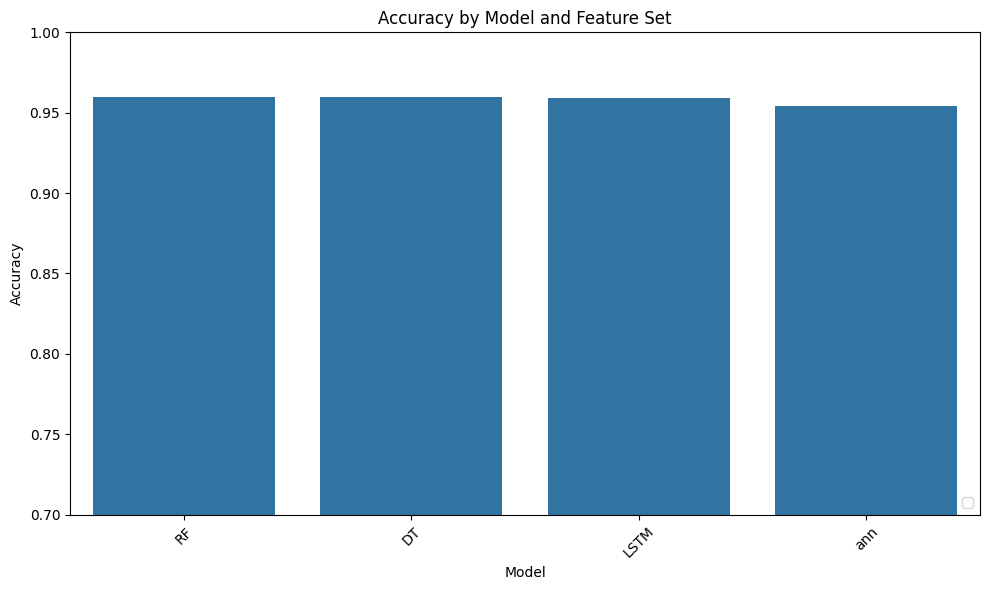

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


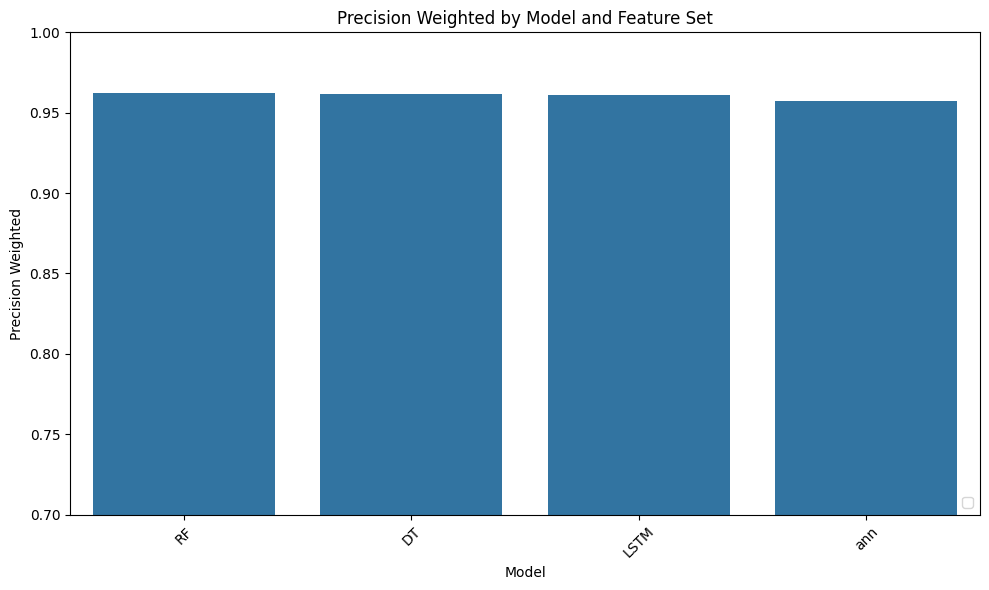

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


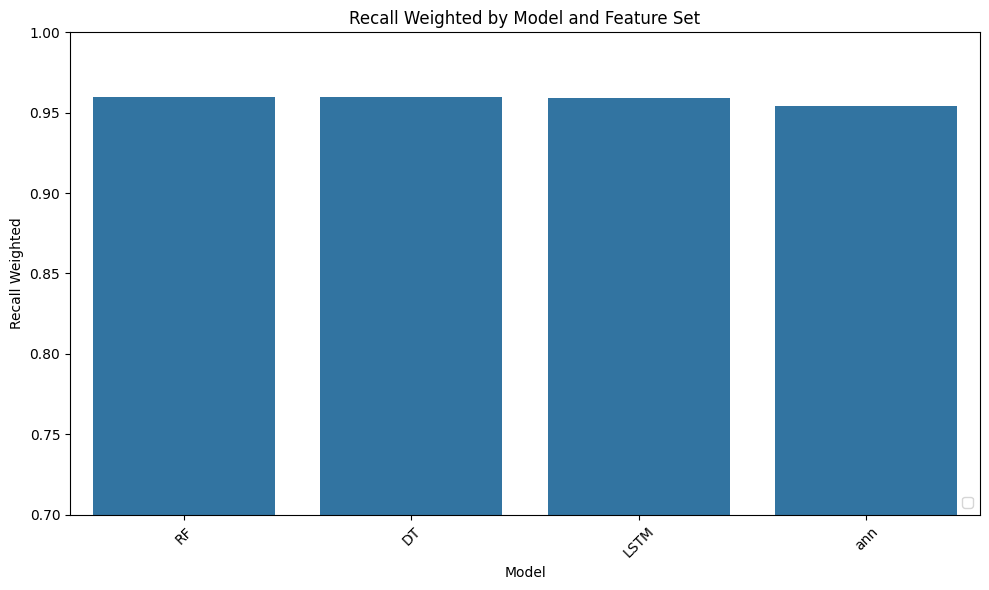

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


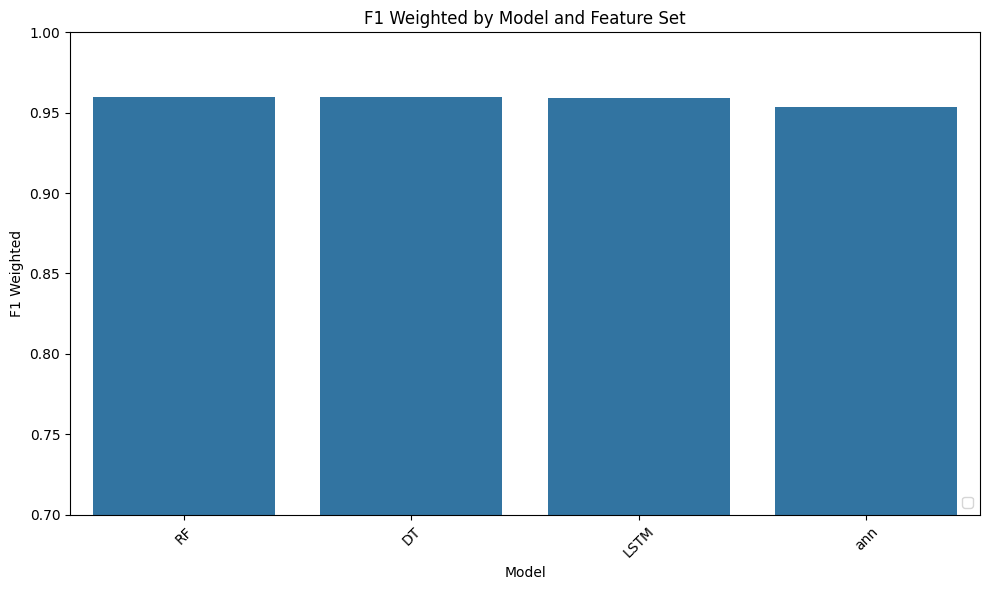

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


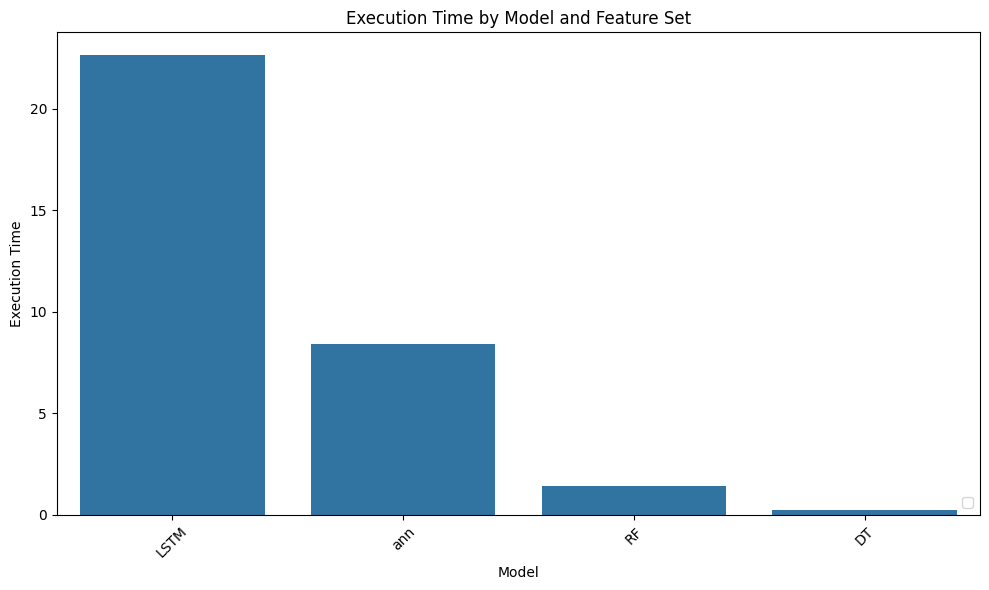

In [33]:

columns = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'execution_time']

for col in columns:
    # Sort the DataFrame by the current column
    sorted_df = score_df.sort_values(by=col, ascending=False)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="model", y=col,  data=sorted_df)

    # Set plot labels and limits
    plt.xlabel("Model")
    plt.ylabel(col.replace('_', ' ').title())  # e.g., "F1 Weighted"
    
    # Only apply ylim for metrics with range [0,1]
    if col != "execution_time":
        plt.ylim(0.7, 1)

    plt.title(f"{col.replace('_', ' ').title()} by Model and Feature Set")
    plt.legend(loc="lower right")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
